# La quantificazione dell'incertezza {#sec-bayes-workflow}

**Prerequisiti**

- Leggere [Bayesian statistics for clinical research](https://www.sciencedirect.com/science/article/pii/S0140673624012959) di @Goligher2024.

- Leggere [Dicing with the unknown](http://onlinelibrary.wiley.com/doi/10.1111/j.1740-9713.2004.00050.x/abstract) di Tony O'Hagan, per una descrizione chiara della distinzione tra incertezza aleatoria e incertezza epistemica.

**Concetti e Competenze Chiave**

- Distribuzione a priori e a posteriori.

- Aggiornamento bayesiano.

- Verosimiglianza marginale.

- Incertezza epistemica e aleatoria.

**Preparazione del Notebook**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import scipy.stats as stats
from scipy.stats import beta
from scipy.special import factorial
from scipy.special import comb
import scipy.special as sp
from scipy.stats import beta
from scipy.integrate import quad

In [2]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = 'retina'

## Introduzione 

> “Quindi non avete una sola risposta alle vostre domande?”  
> “Adson, se l'avessi insegnerei teologia a Parigi.”  
> “A Parigi hanno sempre la risposta vera?”  
> “Mai,” disse Guglielmo, “ma sono molto sicuri dei loro errori.”  
> (Umberto Eco: *Il Nome della Rosa*)

L'approccio bayesiano alla statistica non si limita all'applicazione del Teorema di Bayes, ma si caratterizza per una gestione rigorosa dell'incertezza e per la rappresentazione delle soluzioni attraverso distribuzioni di probabilità. Il processo di modellazione bayesiana, noto come *workflow bayesiano* [@baribault2023troubleshooting], si articola in più fasi: dalla costruzione del modello, all'applicazione del Teorema di Bayes, fino all'analisi critica dei risultati. Questo ciclo iterativo permette un apprendimento continuo, migliorando progressivamente le stime e adattandole alle nuove evidenze che emergono.

L'obiettivo dell'approccio bayesiano non è quello di raggiungere una verità assoluta, ma di aggiornare razionalmente le credenze su una determinata ipotesi, integrando progressivamente nuove informazioni. Questo approccio è particolarmente utile in psicologia, dove i fenomeni analizzati sono complessi e le misurazioni soggette a molte fonti di incertezza.

## Il Valore dell'Incertezza

In psicologia e in altre scienze sociali, l'informazione è spesso incompleta, e le variabili di interesse sono latenti o difficili da osservare direttamente. L'inferenza bayesiana offre un quadro metodologico per rappresentare e affrontare questa incertezza, permettendo di modellare ciò che non si conosce come una variabile aleatoria che può essere aggiornata man mano che si acquisiscono nuovi dati [@jaynes2003probability].

Diversamente dai modelli deterministici, che assumono la possibilità di prevedere i risultati con certezza date tutte le informazioni, i modelli bayesiani accolgono e gestiscono l'incertezza, caratteristica fondamentale in psicologia. Molti fenomeni psicologici coinvolgono variabili latenti – come l'ansia, la motivazione o l'autostima – che non possono essere osservate direttamente. L'approccio bayesiano consente di rappresentare tali variabili in modo flessibile, integrando evidenze precedenti con i dati attuali.

## Interpretazione Frequentista vs. Bayesiana dell'Incertezza

1. **Interpretazione Frequentista**: Immaginiamo di misurare la frequenza di un evento psicologico, come un livello di ansia oltre una certa soglia, in un grande campione di individui simili. Secondo i frequentisti, si potrebbe interpretare l'incertezza come la frequenza relativa dell'evento in situazioni simili nel lungo periodo. Tuttavia, questa interpretazione presenta due problemi principali: non è possibile osservare un evento infinite volte in condizioni identiche, e il "gruppo di riferimento" (o *reference class*) – cioè, le condizioni simili rilevanti – può essere difficile da definire precisamente.

2. **Interpretazione Bayesiana**: Un'interpretazione bayesiana dell'incertezza riguarda invece il grado di credenza soggettiva. Supponiamo che uno psicologo creda con il 10% di fiducia che un individuo avrà un punteggio d'ansia superiore a una certa soglia. Questo grado di fiducia può essere aggiornato man mano che si raccolgono nuove informazioni, utilizzando il Teorema di Bayes per calcolare probabilità a posteriori. A differenza dell’approccio frequentista, l'incertezza bayesiana descrive una credenza soggettiva che può essere costantemente aggiornata.

## Esempi Psicologici dell'Inferenza Bayesiana

**Esempio 1: Misurare l'Ansia con Questionari**

Quando si misura l'ansia tramite un questionario, la stima è soggetta a incertezza per vari motivi:
1. **Risposte Soggettive**: L’interpretazione delle domande può variare tra individui e può essere influenzata dallo stato d’animo.
2. **Misurazioni Incomplete**: Un questionario può non cogliere tutte le sfumature dell’ansia.
3. **Rumore nei Dati**: Errori minori, come distrazioni durante la compilazione, possono influire sulla precisione dei risultati.

Con l’approccio bayesiano, è possibile combinare credenze a priori basate su ricerche precedenti con i dati raccolti per ottenere una stima aggiornata. Ad esempio, se si dispone di una distribuzione di probabilità iniziale sull'ansia, questa distribuzione può essere aggiornata man mano che si raccolgono più dati, permettendo una stima più accurata del livello di ansia effettivo.

**Esempio 2: Effetto del Rinforzo Negativo sulla Motivazione**

Consideriamo uno studio sull'effetto del rinforzo negativo sulla motivazione in un compito. La "motivazione interna" è una variabile latente, non osservabile direttamente. Possiamo inferirla, però, tramite misure indirette, come il tempo trascorso sul compito o la velocità di risposta. Un modello bayesiano consente di collegare queste variabili osservabili alla motivazione latente, rappresentando l'incertezza sia nella variabilità individuale sia nell'effetto del rinforzo negativo. Man mano che vengono raccolti nuovi dati, il modello bayesiano aggiorna le stime di motivazione e permette di esprimere in modo rigoroso la probabilità che un cambiamento osservato sia effettivamente dovuto al rinforzo negativo.

## Inferenza Bayesiana e Incertezza nelle Stime

L'inferenza bayesiana utilizza le probabilità per aggiornare le credenze sui parametri di un modello basandosi sui dati osservati. Queste credenze sono rappresentate da distribuzioni di probabilità, e l’ampiezza di queste distribuzioni riflette l’incertezza associata alle stime. In psicologia, dove spesso si lavora con campioni limitati e misurazioni indirette di variabili latenti, questa gestione dell'incertezza è fondamentale per interpretare i risultati in modo robusto e realistico.

## Il Modello Bayesiano

Un *modello statistico* combina una distribuzione probabilistica con ipotesi sui parametri per descrivere un fenomeno osservato. Ad esempio, possiamo modellare il lancio di una moneta equa con un modello binomiale, in cui la probabilità $\theta$ è fissata a 0.5, oppure modellare l'altezza degli uomini italiani con un modello normale, in cui $\mu$ è 183 cm e $\sigma$ è 5 cm. In termini bayesiani, il modello statistico include tre componenti principali:

1. **Distribuzione a Priori (Prior)**: Rappresenta le credenze iniziali sui valori dei parametri del modello, informate da ricerche precedenti o da assunzioni neutre.
   
2. **Verosimiglianza (Likelihood)**: Descrive la probabilità di osservare i dati dati i parametri del modello, riflettendo il processo che genera i dati.

3. **Distribuzione a Posteriori (Posterior)**: È la distribuzione aggiornata dei parametri dopo aver osservato i dati, ottenuta combinando la prior e la verosimiglianza mediante il teorema di Bayes. La posterior rappresenta la conoscenza aggiornata dopo aver integrato le informazioni fornite dai dati.

La modellazione bayesiana descrive il **processo generativo** che ha prodotto i dati osservati, incorporando l'incertezza nei parametri e aggiornando continuamente le stime man mano che emergono nuovi dati. Questo approccio è particolarmente utile in contesti come la psicologia, dove i fenomeni complessi e le variabili latenti rendono necessario modellare l'incertezza in modo esplicito.

## Componenti Chiave della Modellazione Probabilistica

1. **Variabili Aleatorie**: Quantità incerte che assumono diversi valori secondo una distribuzione di probabilità. Ad esempio, il livello di depressione di un paziente può essere trattato come una variabile aleatoria.
   
2. **Distribuzioni di Probabilità**: Descrivono come i valori di una variabile aleatoria sono distribuiti. Ad esempio, una distribuzione normale può essere utilizzata per modellare la variabilità dell'ansia in una popolazione.

3. **Inferenza Bayesiana**: Aggiorna la distribuzione di probabilità delle variabili di interesse sulla base dei nuovi dati, migliorando progressivamente le stime.

**Esempio: Inferenza sul Livello di Depressione**

In uno studio clinico sulla depressione, possiamo utilizzare l'inferenza bayesiana per stimare il livello di depressione di un paziente partendo da una distribuzione a priori informata da studi precedenti. Ogni nuovo dato raccolto (come punteggi a questionari o osservazioni) permette di aggiornare questa stima, affinando progressivamente la comprensione del fenomeno.

## Il Potere dell'Aggiornamento Bayesiano

Il vero punto di forza della modellazione bayesiana risiede nella sua capacità di aggiornare continuamente le credenze sui parametri del modello man mano che si raccolgono nuovi dati. Questo processo iterativo, basato sul teorema di Bayes, consente di integrare sia le credenze iniziali (a priori) sia le evidenze empiriche (verosimiglianza) per ottenere stime sempre più precise.

**Esempio Intuitivo: Il Globo Terrestre**

Un esempio intuitivo per spiegare l'aggiornamento bayesiano è quello proposto da @McElreath_rethinking. Supponiamo di voler stimare la proporzione della superficie terrestre coperta d'acqua. L'esperimento consiste nel lanciare un globo terrestre in aria, afferrarlo e osservare se la superficie sotto il dito è acqua o terra. Dopo ogni osservazione, possiamo aggiornare le nostre credenze sulla proporzione d'acqua (p).

Iniziamo con una distribuzione a priori che assegna la stessa probabilità a tutti i valori possibili di $p$ (proporzione d'acqua). Dopo il primo lancio, in cui osserviamo acqua ("W"), la probabilità che $p$ sia zero diminuisce, mentre quella che $p$ sia maggiore aumenta. Man mano che raccogliamo più dati, la distribuzione si aggiorna, riducendo l'incertezza e convergendo verso una stima più precisa di $p$.

Con l'aumento dei dati osservati, la distribuzione a posteriori si concentra sempre di più attorno ai valori di $p$ che meglio spiegano i dati. Questo processo rappresenta il continuo affinamento delle stime bayesiane, che diventano più accurate man mano che le evidenze si accumulano.

In sintesi, l'aggiornamento bayesiano fornisce un quadro flessibile e sistematico per trattare l'incertezza e integrare nuove informazioni. È particolarmente utile nelle scienze psicologiche e sociali, dove la complessità e la variabilità dei fenomeni rendono difficile ottenere stime precise. Questo approccio consente di migliorare costantemente la comprensione dei fenomeni, adattando le credenze man mano che emergono nuovi dati.

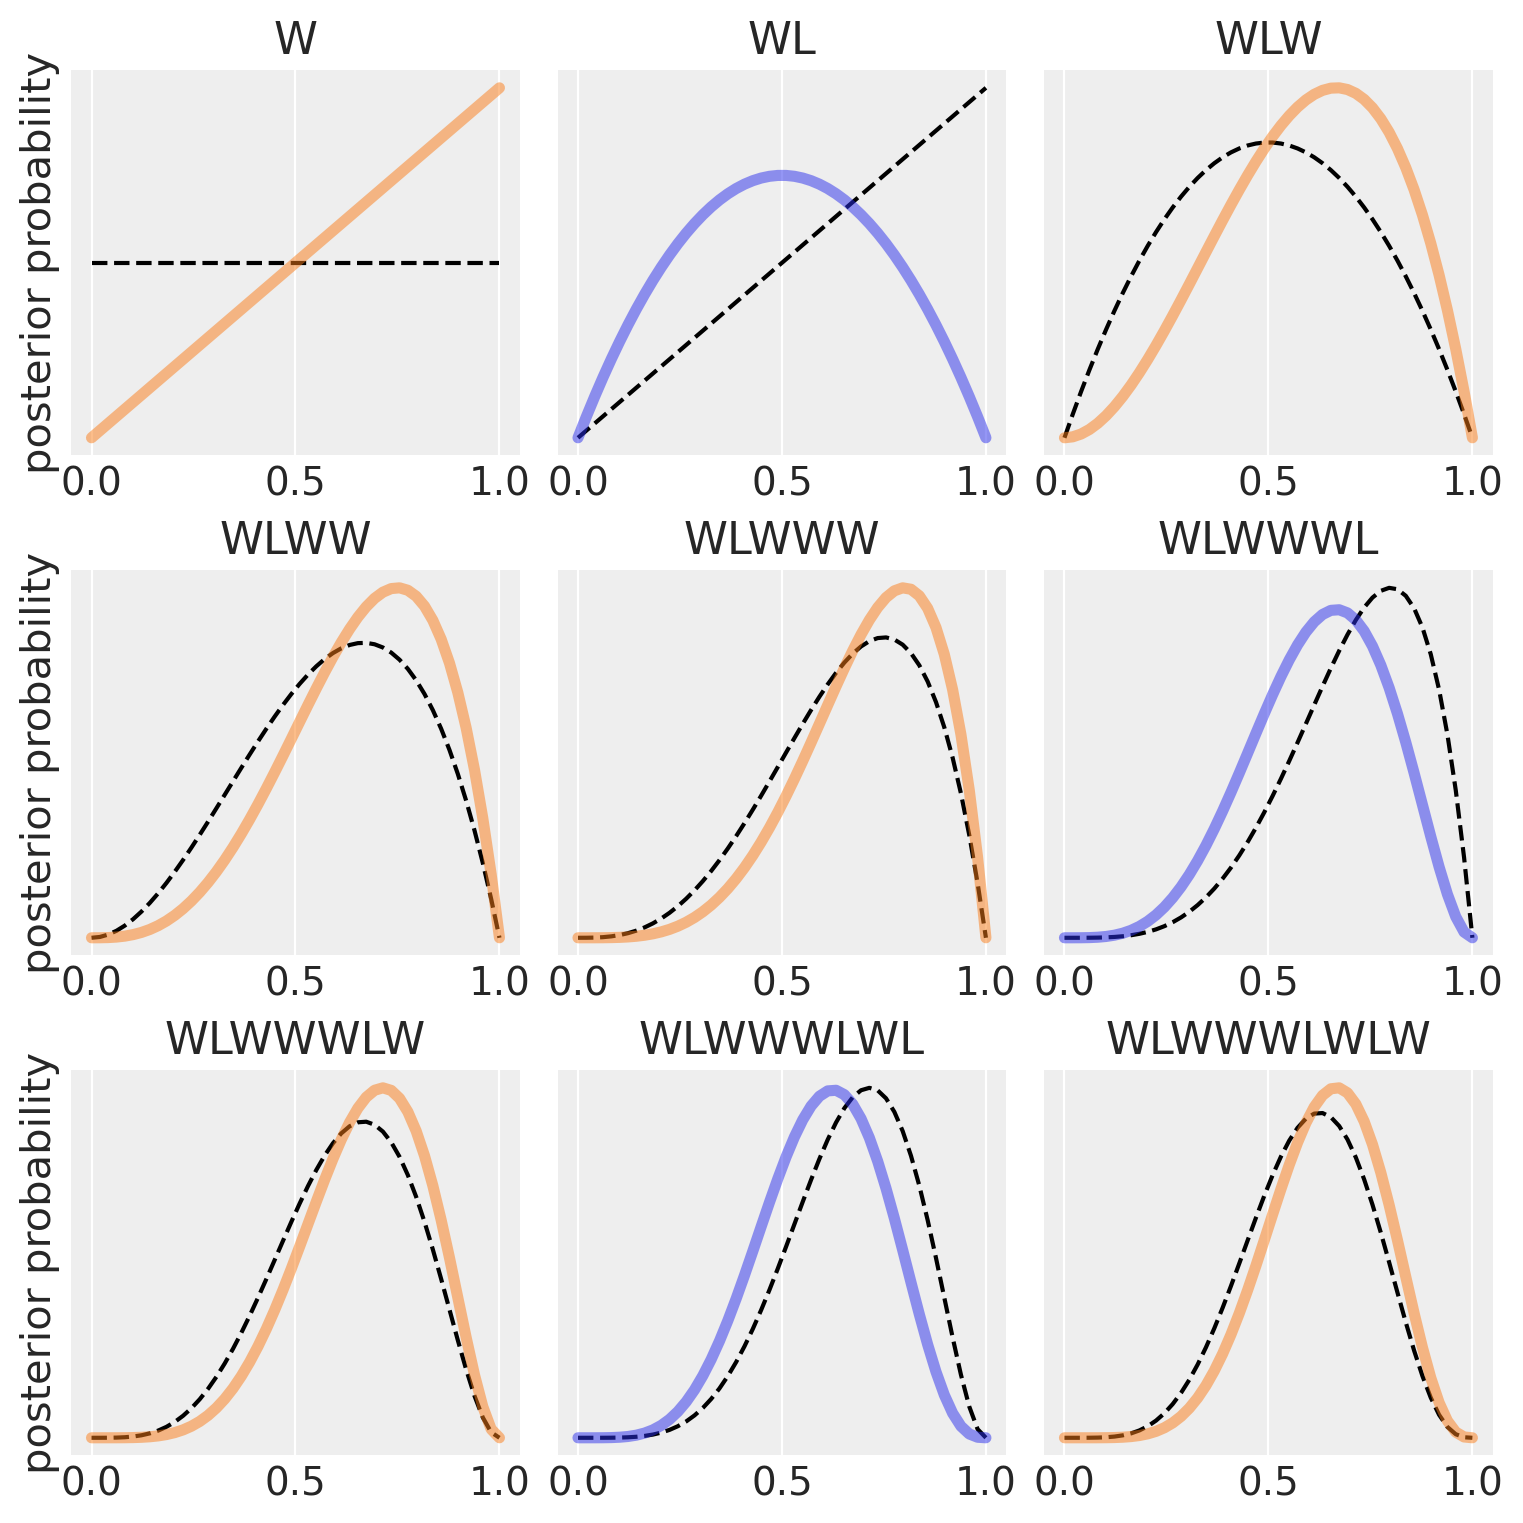

In [5]:
#| echo: false

def beta(W, L, p):
    return factorial(W + L + 1) / (factorial(W) * factorial(L)) * p**W * (1 - p) ** L


def plot_beta_from_observations(observations: str, resolution: int = 50, **plot_kwargs):
    """Calcualte the posterior for a string of observations"""
    n_W = len(observations.replace("L", ""))
    n_L = len(observations) - n_W
    proportions = np.linspace(0, 1, resolution)

    probs = beta(n_W, n_L, proportions)
    plt.plot(proportions, probs, **plot_kwargs)
    plt.yticks([])
    plt.title(observations)


# Tossing the globe
observations = "WLWWWLWLW"
fig, axs = plt.subplots(3, 3, figsize=(7.5, 7.5))
for ii in range(9):
    ax = axs[ii // 3][ii % 3]
    plt.sca(ax)
    # Plot previous
    if ii > 0:
        plot_beta_from_observations(observations[:ii], color="k", linestyle="--")
    else:
        # First observation, no previous data
        plot_beta_from_observations("", color="k", linestyle="--")

    color = "C1" if observations[ii] == "W" else "C0"
    plot_beta_from_observations(
        observations[: ii + 1], color=color, linewidth=4, alpha=0.5
    )

    if not ii % 3:
        plt.ylabel("posterior probability")

Il grafico precedente illustra un processo di aggiornamento bayesiano, in cui vengono progressivamente aggiornate le credenze sulla proporzione di superficie coperta d'acqua ($p$) del globo terrestre, man mano che vengono raccolti nuovi dati.

L'esperimento prevede il lancio di un globo terrestre per osservare se la superficie sotto il dito è acqua ("W") o terra ("L"). Dopo ogni lancio, le probabilità sui possibili valori di $p$ vengono aggiornate sulla base delle osservazioni, utilizzando il teorema di Bayes. Il processo è visualizzato attraverso una serie di grafici, organizzati in una griglia 3x3, con ogni pannello che rappresenta un’osservazione aggiuntiva.

- **Linee tratteggiate**: Ogni curva tratteggiata in un pannello rappresenta la distribuzione di probabilità a posteriori (posterior) derivata dal pannello precedente. In altre parole, questa è la distribuzione che incorpora tutte le osservazioni fino a quel momento.
  
- **Linee continue**: Ogni curva continua rappresenta la nuova distribuzione a posteriori, aggiornata dopo aver aggiunto una nuova osservazione. Questa curva combina la distribuzione a priori (che coincide con la curva tratteggiata dal pannello precedente) e la nuova evidenza.

1. **Primo Pannello (Osservazione: W)**  
   - La prima osservazione è "acqua" (W). La distribuzione a priori è uniforme, poiché non ci sono informazioni iniziali. Dopo aver osservato acqua, la distribuzione a posteriori si aggiorna: la probabilità che $p = 0$ (nessuna acqua) è ora zero, e la curva si sposta verso destra, indicando che è più probabile che $p$ sia maggiore di 0. 

2. **Secondo Pannello (Osservazione: L)**  
   - La seconda osservazione è "terra" (L). La curva si sposta leggermente verso sinistra, poiché è ora meno probabile che $p$ sia molto alto (vicino a 1). La probabilità che $p$ sia 0.5 diventa massima, in quanto abbiamo osservato una volta acqua e una volta terra.

3. **Terzo Pannello (Osservazione: W)**  
   - Il terzo lancio produce di nuovo acqua. La curva si sposta nuovamente verso destra, con un picco vicino a $p = 0.75$, riflettendo che abbiamo osservato acqua due volte su tre. La distribuzione si aggiorna in base alla nuova evidenza.

4. **Pannelli Successivi**  
   - Ogni nuovo pannello segue lo stesso schema: la distribuzione a priori (linea tratteggiata) viene aggiornata con la nuova osservazione (linea continua). Se viene osservata acqua (W), il picco della distribuzione si sposta a destra; se viene osservata terra (L), il picco si sposta a sinistra. In ogni caso, la curva diventa progressivamente più "appuntita", indicando che l'incertezza sulla vera proporzione di acqua diminuisce con l'aumentare del numero di osservazioni.

L'aspetto fondamentale dell'approccio bayesiano è che ogni distribuzione a posteriori aggiornata (linea continua) diventa la nuova distribuzione a priori per la successiva osservazione. Questo processo iterativo permette di apprendere progressivamente dai dati, integrando ogni nuova informazione per affinare la stima di $p$. Alla fine, la distribuzione diventa sempre più concentrata intorno al valore più probabile di $p$, man mano che raccogliamo più dati.

In conclusione, l'esempio illustra come l'aggiornamento bayesiano modifichi le nostre credenze sulla proporzione d'acqua ($p$) sulla superficie del globo, basandosi sulle osservazioni raccolte. Ogni curva rappresenta la sintesi delle conoscenze attuali, combinando le osservazioni precedenti con l'ultima evidenza raccolta. Il grafico dimostra visivamente come l'approccio bayesiano consenta di trattare l'incertezza e aggiornare le stime in modo coerente e progressivo.

## Il Processo Generatore dei Dati

Nel contesto dell'aggiornamento bayesiano, è fondamentale fare un'assunzione su quale modello statistico descriva il **processo generatore dei dati**, ossia il meccanismo che collega i parametri sconosciuti ai dati osservati. Questo modello è rappresentato dalla funzione di verosimiglianza, che descrive la probabilità di osservare i dati per ogni possibile valore del parametro incognito. Ad esempio, nel caso di esperimenti bernoulliani come quello dei lanci del globo, ogni prova può risultare in un successo (acqua) o in un fallimento (terra), e l'obiettivo è stimare la probabilità di successo, $\theta$.

Il processo generatore dei dati per questo tipo di esperimento è ben descritto da una **distribuzione binomiale**, che modella il numero di successi osservati in una serie di prove indipendenti, ciascuna caratterizzata dalla stessa probabilità $\theta$. In questo contesto, $\theta$ rappresenta la proporzione di superficie coperta d'acqua sul globo, e l'assunzione chiave è che essa rimanga costante durante l'intero esperimento.

::: {#fig-inductive-bias}
![](../../figures/inductive-bias.jpg){width="50%"}

Gli stessi dati possono essere coerenti con diverse ipotesi riguardanti il processo che li ha generati[Figura tratta da @freiesleben2024supervised].
:::

## Aggiornamento Bayesiano e Processo Generatore

L'aggiornamento bayesiano permette di modificare le nostre credenze riguardo al valore del parametro $\theta$ man mano che osserviamo nuovi dati. Il punto di partenza è una **distribuzione a priori** su $\theta$, che può riflettere la nostra ignoranza (ad esempio, una distribuzione uniforme, che assegna uguale probabilità a tutti i valori di $\theta$ tra 0 e 1) o conoscenze preesistenti. Nel nostro esempio con il globo, possiamo iniziare con una distribuzione a priori uniforme, che indica che ogni proporzione di acqua è inizialmente considerata ugualmente probabile.

Man mano che raccogliamo dati (ad esempio, 6 successi su 9 lanci), applichiamo il Teorema di Bayes per combinare la distribuzione a priori con la verosimiglianza dei dati osservati, ottenendo una **distribuzione a posteriori** che rappresenta le nostre credenze aggiornate su $\theta$. La distribuzione a posteriori riflette le informazioni aggiunte dai dati e fornisce una stima aggiornata e più precisa di $\theta$.

## Interpretazione della Distribuzione a Posteriori

La distribuzione a posteriori ci permette di fare inferenze più solide su $\theta$. In particolare, possiamo calcolare:

- **Moda**: Il valore di $\theta$ con la massima probabilità, che indica la stima più plausibile.
- **Media o Mediana**: Altre misure riassuntive della distribuzione a posteriori, che possono fornire ulteriori informazioni sull’intervallo di valori probabili per $\theta$.

L'incertezza sulla stima è rappresentata dall'**ampiezza** della distribuzione a posteriori. Se la distribuzione è stretta, significa che l'incertezza è bassa, mentre una distribuzione più ampia indica una maggiore incertezza. Con l’aumento dei dati osservati, la distribuzione tende a concentrarsi intorno a un intervallo ristretto, riducendo l’incertezza e migliorando la precisione della stima.

Nel caso del globo, ad esempio, se osserviamo che la distribuzione a posteriori ha un picco vicino a $\theta = 0.67$, possiamo concludere che la probabilità più plausibile per la proporzione di acqua sul globo è circa 67%. Inoltre, se la distribuzione a posteriori è stretta, possiamo essere più sicuri di questa stima, mentre se è più ampia, la nostra incertezza sarà maggiore.

## Influenza delle Distribuzioni a Priori

In questo esempio, abbiamo utilizzato una **distribuzione a priori uniforme**, che esprime una totale mancanza di conoscenza iniziale su $\theta$. Tuttavia, in contesti in cui abbiamo informazioni preesistenti, è possibile utilizzare distribuzioni a priori più informative. Ad esempio, se sappiamo da studi precedenti che circa il 70% della superficie terrestre è coperta d'acqua, possiamo utilizzare una distribuzione a priori che rifletta questa conoscenza. Questo tipo di distribuzione a priori informativa può rendere l'aggiornamento bayesiano più efficiente, portando a stime più precise con meno dati.

## Vantaggi dell'Aggiornamento Bayesiano

Uno dei principali vantaggi dell'approccio bayesiano è che ogni nuova osservazione aggiorna automaticamente le credenze preesistenti, integrando le informazioni precedenti con i nuovi dati. Questo processo consente un apprendimento iterativo e progressivo, che diventa più efficiente man mano che si accumulano dati. Inoltre, la flessibilità nella scelta della distribuzione a priori consente al ricercatore di adattare l'inferenza bayesiana al contesto specifico, migliorando ulteriormente la precisione delle stime.

In sintesi, il processo generatore dei dati, modellato tramite la verosimiglianza, gioca un ruolo centrale nell'aggiornamento bayesiano. Nel caso del globo, abbiamo modellato il fenomeno utilizzando una distribuzione binomiale e, attraverso l'applicazione del Teorema di Bayes, abbiamo aggiornato progressivamente le nostre credenze sulla proporzione di acqua osservata. Il risultato è una stima sempre più precisa di $\theta$, con una distribuzione a posteriori che riflette sia le osservazioni passate sia le nuove evidenze, riducendo progressivamente l'incertezza.

## Riflessioni Conclusive

Negli ultimi anni, i metodi bayesiani stanno acquisendo sempre più importanza nel campo dell'inferenza statistica, anche in discipline come la psicologia. Questa diffusione è favorita dall'accesso a risorse educative e a testi fondamentali, come quelli di @albert_2019prob, @Johnson2022bayesrules, @McElreath_rethinking e @doing_bayesian_data_an, che hanno reso la modellizzazione bayesiana più accessibile, chiarendo i concetti centrali in modo pratico e comprensibile.

L'approccio bayesiano si distingue dalla metodologia frequentista tradizionale per la sua capacità di trattare i parametri di interesse come quantità probabilistiche. Invece di considerare i parametri come valori fissi e sconosciuti (come avviene nel paradigma frequentista), il bayesianesimo assegna ai parametri una **distribuzione a priori**, che rappresenta le credenze iniziali del ricercatore. Man mano che nuovi dati vengono raccolti, queste credenze vengono aggiornate tramite il **teorema di Bayes**, portando a una **distribuzione a posteriori** che riflette sia le informazioni pregresse sia l'evidenza empirica. Questa distribuzione aggiornata consente di esprimere l'incertezza sui parametri in modo più completo e informato.

Uno dei principali vantaggi dell'approccio bayesiano è la sua capacità di combinare conoscenze pregresse con nuove osservazioni in modo fluido e sistematico. Ogni nuova informazione arricchisce e raffina le stime, rendendole più accurate e interpretabili nel contesto del problema specifico. Questo non solo migliora la precisione delle inferenze, ma permette anche una migliore comprensione dell'incertezza che circonda i parametri studiati.

In definitiva, l'inferenza bayesiana non è solo uno strumento analitico, ma un approccio dinamico che incoraggia un’interazione continua tra teoria ed evidenza. Offrendo una flessibilità unica e una gestione esplicita dell'incertezza, il bayesianesimo si rivela un metodo potente per supportare il processo decisionale in contesti complessi, rendendo le sue applicazioni particolarmente rilevanti in campi come la psicologia, dove l'incertezza è una componente inevitabile dell'analisi dei dati.

## Informazioni sull'Ambiente di Sviluppo {.unnumbered}

In [14]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: Sat Oct 12 2024

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.26.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 24.0.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

arviz     : 0.18.0
scipy     : 1.14.0
numpy     : 1.26.4
matplotlib: 3.9.1

Watermark: 2.4.3

